# 6 - Feature Transformation

## Introduction:

In this project, methods for handling datasets that presents with large amounts of feature (columns) or even highly un-interpretable features will be covered, whereby it employs purely mathematical transformations that relies on programming and mathematics (linear algebra) to transform the dataset. The algorithms wwere designed to alter the internal structure of the dataset to produce new columns (new matrix of data) that captures the __variance__ of the data.

## Breakdown of this Project:
- Dimension reduction
- Principal Component Analysis (PCA)
- Applying PCA manually
- Applying Scikit-learn's PCA
- Linear Discriminant Analysis (LDA)
- Applying LDA manually
- Applying Scikit-learn's LDA

## Datasets:

Link: https://archive.ics.uci.edu/ml/datasets/iris

Dataset Description: This Dataset has been widely used for pattern recognition. The dataset consists of 3 classes with 50 instances each, where each class represents a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

## Requirements:
- sklearn (scikit-learn)
- numpy
- pandas
- os
- timeit
- seaborn


## 1 - Dimension reduction:

Aside from from Feature Selection in the previous project, the two new concepts to be brought up here are __Feature Construction__ and __Feature Transformation__. 

For __Feature Construction__:

This technique also constructs new columns (features), but is limited to utilising simple operations such as addition, multiplication and so on between a few columns at a time. This means that the output columns are based off of the original dataset, and with the use of the mentioned operations, this would also lead to an explosive amount of features. However, the goal here would be to create enough features to capture much of the feature interactions that the ML models can benefit from.

For __Feature Transformation__:

This technique aims to create new columns (features) by using the hidden sttructures within the dataset to output completely new and structurally different dataset. This technique uses linear alegbra (matrices) to extract the latent structure from the original dataset. This inherently captures the variance of the data, which will be very useful from the ML model to learn from. The new columns is able to utilise smaller bits of information from all of the orginal columns, which means that it does not need to excessively create a large number of columns like in Feature Constuction. 

## 2 - Principal Component Analysis (PCA):

PCA falls under the Feature Transformation technique, where it takes several correlated features from the dataset and projects them onto a coordinate (axis) space that has fewer correlated features. These new uncorrelated columns (features) are called __Principal Components__. Principal Components serves as an alternative coordinate system to the original feature space, whhere it requires fewer features that is able to capture most of the variance as possible. 

PCA (unsupervised algorithm) identifies pattterns and laten structures that is inherent to the dataset to create the new columns. If the original dataset is sized at (n x d), where n = no. of observations and d = no. of original features, the projected PCA matrix is then (n x k), where k should be less than d.

Visually:

<img src="Description Images/FeatureTransformation_1.PNG" width="450">

Image Ref -> Self-made.

Principal components are ordered by variance explained, where the 1st Principal Component is able to describe most of the variance in the data, while 2nd Principal Component does the second most to explain the variance in the data.

#### PCA Process:

This can be broken down into 4 steps:
1. Create or compute the covariance matrix of the dataset.
2. Compute the Eigenvalues of the covariance matrix.
3. Keep the top-k eigenvalues by sorting them.
4. Transform the dataset with these top-k eigenvalues to create new data points.


## 3 - Perform PCA with the IRIS dataset: manual computation.

### 3.1 - Import the dataset: Iris.

Luckily, this dataset is also available within the sklearn package.

In [1]:
# Import thhe required Libraies:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load in the dataset:
iris_data_df = load_iris()

### 3.1 - Split the dataset into X and Y:

In [5]:
X_iris, y_iris = iris_data_df.data, iris_data_df.target

In [6]:
# Inspect the Target Variable:
print(iris_data_df.target_names)

# Inspect the Feature Variables:
print(iris_data_df.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 3.3 - Exploratory Data Analysis:

#### 3.3.1 - Visualise the dataset:

In [8]:
# Define the Labels Dict:
label_dict_iris = {i: k for i, k in enumerate(iris_data_df.target_names)}

In [9]:
# Define a function for plotting:
def plot_iris(X, y, title, x_label, y_label):
    """ This funtion will plot the Iris Dataset.
    Parameters:
        - X, is the input features data.
        - y, is the target variable.
        - x_label, is the x-axis labels.
        - y_label, is the y-axis labels.
    Returns:
        - returns a plot (visualisation) of the input dataset.
    """
    # Set the position of thhe subplot:
    ax = plt.subplot(111)
    
    # Plot:
    for label, marker, color in zip( range(3), ('^', 's', 'o'), ('blue', 'red', 'green') ):

        plt.scatter(x=X[:,0].real[y == label],
                    y=X[:,1].real[y == label],
                    color=color,
                    alpha=0.5,
                    label=label_dict_iris[label]
                   )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

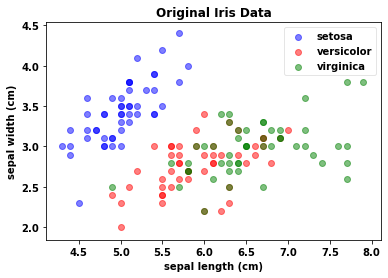

In [11]:
# Apply the function:
plot_iris(X_iris, y_iris, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

### 3.4 - Manual Computation of PCA:

Visually:

<img src="Description Images/Iris_PCA.PNG" width="650">

Image Ref -> Self-made.

As mentioned earlier, this can be broken down into 4 steps:
1. Create or compute the covariance matrix of the dataset.
2. Compute the Eigenvalues of the covariance matrix.
3. Keep the top-k eigenvalues by sorting them.
4. Transform the dataset with these top-k eigenvalues to create new data points.


In [12]:
# Import the required Libraries:
import numpy as np

In [16]:
# Step 1 - Compute the covariance matrix of the dataset:

# Compute the mean:
mean_vector = X_iris.mean(axis=0)
print("The mean value for each column are: {}".format(mean_vector))

# Compute the Covariance Matrix:
covariance_matrix_iris = np.cov(m=(X_iris).T)
print("The shape of the covariance matrix is: {}".format(covariance_matrix_iris.shape))


The mean value for each column are: [5.84333333 3.05733333 3.758      1.19933333]
The shape of the covariance matrix is: (4, 4)


In [18]:
# Inspect the Covariance Matrix:
covariance_matrix_iris

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [21]:
# Step 2 - Compute the Eigenvalues of the covariance matrix:
eig_val_covarianceMatrix, eig_vec_covarianceMatrix = np.linalg.eig(covariance_matrix_iris)

# Print the Eigenvalues and Eigenvectors: sort in descending order.
for i in range(len(eig_val_covarianceMatrix)):
    eigvec_cov = eig_vec_covarianceMatrix[:,i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_covarianceMatrix[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034864
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863386
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.078209500042919
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973450298
------------------------------


#### Compute the % of Explained Variance that was captured by each of the Eigenvalue:

Formula: eigenvalue of that components divided by the sum of all eigen values

In [22]:
explained_variance_ratio = eig_val_covarianceMatrix/eig_val_covarianceMatrix.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

#### Scree Plot:

Text(0, 0.5, '% of Variance Explained <= k')

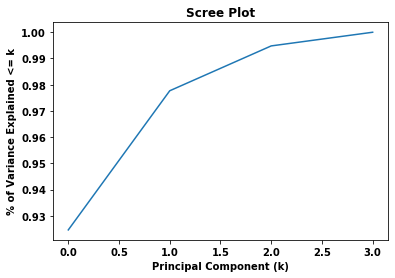

In [23]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

From the above, it can be seen that 2 principal components are able to explain 99% of the total variance in the original dataset. This also means that the dataset's size can be effectively shrunken down by half while still able to maintain its integrity and speed up its performance. 


In [31]:
# Inspect the Eigenvector Covvariance Matrix:
eig_vec_covarianceMatrix

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [32]:
# Step 3 - Keep the top-k eigenvalues by sorting them: 2 principal components are chosen (top-2)
top_2_eig_vec = eig_vec_covarianceMatrix[:, :2].T

# Inspect:
top_2_eig_vec

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [34]:
# Step 4 - Transform the dataset with these top-k eigenvalues to create new data points:
X_iris_transformed = np.dot(a=X_iris, b=top_2_eig_vec.T)

# Inspect:
X_iris_transformed[:5, ]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

In [35]:
# Inspect the shapes:
X_iris.shape, X_iris_transformed.shape

((150, 4), (150, 2))

Here, the features dataset of Iris has been effectively ttransformed into a new matrix of only 2 columns.

## 3.5 - Scikit-Learn's PCA:

In [36]:
# Import the required Libraries:
from sklearn.decomposition import PCA

D:\anaconda3\envs\Py37Work\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda3\envs\Py37Work\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
# Instantiate:
pca = PCA(n_components=2)

# Fit it to the dataset:
pca.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# Inspect the specified 2-Components:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

The output can be seen to be similar to the manual computation. Interestingly, the value in the second column can be seen to be negative in both, this is because the eigenvectors can be both +ve and -ve, and it would still have very little effect on the ML pipeline.

In [39]:
# Transform the dataset with these top-k eigenvalues to create new data points:
X_iris_transformed_pca = pca.transform(X_iris)

# Inspect:
X_iris_transformed_pca[:5, ]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

Notice the difference here, where the manual method's 2nd column have different values. This is because the PCA methods applies a centering method to the data. This can also be implemented to show the same results.

In [40]:
X_iris_transformed_pca[:5, ], X_iris_transformed[:5, ]

(array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]),
 array([[ 2.81823951, -5.64634982],
        [ 2.78822345, -5.14995135],
        [ 2.61337456, -5.18200315],
        [ 2.75702228, -5.0086536 ],
        [ 2.7736486 , -5.65370709]]))

In [41]:
# Centre the data:
X_iris_transformed = np.dot(X_iris - mean_vector, top_2_eig_vec.T)

# Inspect:
X_iris_transformed[:5, ]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

#### Visualise the dataset that has been transformed:

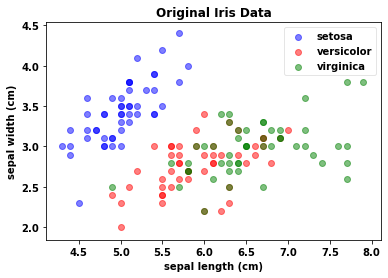

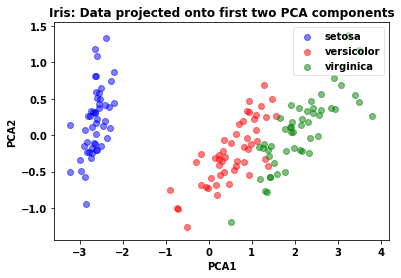

In [42]:
# For the original:
plot_iris(X_iris, y_iris, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

plt.show()

# For the Transformed dataset:
plot_iris(X_iris_transformed_pca, y_iris, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

### Observation:

When compared to the original plot, the transformed Iris dataset in the projected space is able tto show more separattion from each other, and that the axis is rotated too. This is how the Principal components are working in order to capture the variance that is inherent to the data. 


In [43]:
# Compute the percentage of variance in data explained by each component:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 3.6 - PCA to De-correlate the Features:

This is one of the benefits of utilising PCA, where it inherently outputs __linearly independent__ features as a result of the eigenvalue decomposition procedure. This can be seen as the principal components are perpendicular to one another. 

This benefits ML models as it takes in the assumption that the input features are independent and thatt in utilising PCA, this was ensured. 

#### Let's check for the linear independence:

To do this, compute the average linear correlation coefficient between each of the fetures, for both original and PCA projected datasets. 


In [44]:
# Compute the correlation matrix for the orignal dataset:
np.corrcoef(X_iris.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [54]:
# Take all the values above the diagonals of 1s and determine 
# the average correlation between all of the the features:
np.corrcoef(X_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.11756978,  0.87175378,  0.81794113, -0.4284401 , -0.36612593])

In [55]:
# Calculate the mean of the arravy above:
np.corrcoef(X_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.1555118162316355

The average correlation coefficient for the original features is 0.15. This is small but it is not zero (close to linearly independent, but not close enough).

Next, do the same with PCA:

In [56]:
# Determine ALL four of the principal components:
pca_full = PCA(n_components=4)

# Fit to the dataset:
pca_full.fit(X_iris)

# Transform the dataset:
X_iris_transformed_pca_full = pca_full.transform(X_iris)

# Compute the average correlation between all of the the features:
np.corrcoef(X_iris_transformed_pca_full.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

6.977229908344418e-16

The value above is very close to zero, which means it is linearly independent. This means that the data projected onto the PCA space consists of fewer correlated features which is highly useful for ML models.

## 3.7 - Effects of Centering and Scaling Data on PCA:

It should be noted that sklearn's CPA method does automatically centres the data in the prediction phhase, however it does not perform centering in the fitting phase. This is becasue, it does not affect the principcal components in the fitting phase and therefore this step is not required, otherwise it is anothe computational expense. 

In [57]:
# Import the required libraries:
from sklearn.preprocessing import StandardScaler

#### Centering the data:

[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]


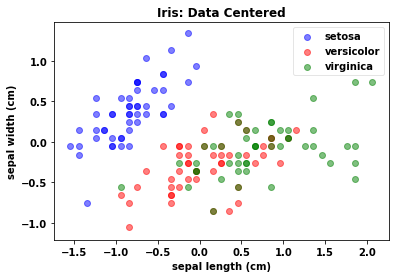

In [62]:
# Centre the data:
X_iris_centred = StandardScaler(with_std=False).fit_transform(X_iris)

# Inspect:
print(X_iris_centred[:5, ])

# Plot:
plot_iris(X_iris_centred, y_iris, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


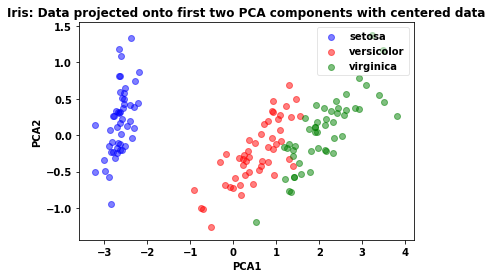

In [63]:
# Fit the PCA to the centred data: 2 principal components from earlier
pca.fit(X_iris_centred)

# Inspect the specified 2-Components:
print(pca.components_)

# Transform the data onto the PCA space:
print(pca.transform(X_iris_centred)[:5, ])

# Plot
plot_iris(pca.transform(X_iris_centred), y_iris, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [64]:
# Compute the percentage of variance in data explained by each component:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

The output of the "explained_variance_ratio_" is the same as earlier, this means that the matrices have the same covariance matrix as thhe centtred counterparts. This was the reason PCA does not centre the data while computing for the eigenvalues and eigenvectors.

#### Scaling the Data:

Scale the data with the standard z-score scaling.

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


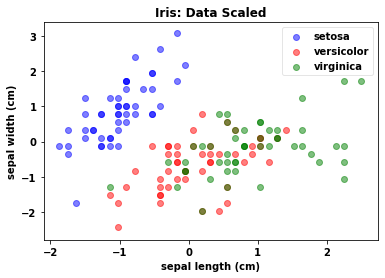

In [65]:
# Centre the data:
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Inspect:
print(X_iris_scaled[:5, ])

# Plot:
plot_iris(X_iris_scaled, y_iris, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

__Note__: The plotted data in its original form, centred and scaled have __Different Axes__. But it does not effect the feature extraction phase of the ML pipeline.

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


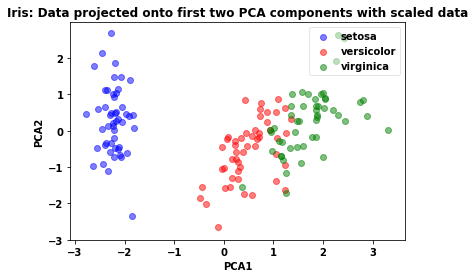

In [66]:
# Fit the PCA to the centred data: 2 principal components from earlier
pca.fit(X_iris_scaled)

# Inspect the specified 2-Components:
print(pca.components_)

# Transform the data onto the PCA space:
print(pca.transform(X_iris_scaled)[:5, ])

# Plot
plot_iris(pca.transform(X_iris_scaled), y_iris, "Iris: Data projected onto first two PCA components with scaled data", "PCA1", "PCA2")

In [67]:
# Compute the percentage of variance in data explained by each component:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

As it can be seen, the 1st principal component has a lower explained variance now than when compared to earlier. This is because, when the data was scaled, the column's covariance with one another has become consistent and the variance explained by each of the principal components was spread out rather than pertaining to just the 1st principal component. 

Note: it is a good idea to check for the differences in pipeline's performance that is induced by scaling the data and un-scaled data.

## 3.8 - Deeper Dive into Principal Components:

This section will venture into how the principal components are interpreted.

In [ ]:
break

In [ ]:
# Define the Working Directory for the Dataset:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + "/Dataset/"

# Load in the dataset:
_dataset_df = pd.read_csv(path_to_dataset + '.csv')

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 